In [1]:
import numpy as np 
import pandas as pd 
from scipy.stats import gamma, norm

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys 
sys.path.append("..") 
from utils.analyze import * 
from utils.viz import viz
viz.get_style()

In [6]:
data = build_pivot_table('map', min_q=.01, max_q=.99)
data.columns.grouby(by=['group'])[['l1','l2','l3']].mean().reset_index()

#-------- Clean Outliers ---------- #

    308 rows
    90.6% data has been retained


AttributeError: 'Index' object has no attribute 'grouby'

In [2]:
data = build_pivot_table('map', min_q=.01, max_q=.99)
data['is_PAT'] = data['group'].apply(lambda x: x!='HC')
data = data.groupby(by=['sub_id', 'feedback_type', 'b_type']).mean().reset_index()
    

#-------- Clean Outliers ---------- #

    308 rows
    90.6% data has been retained


l1 t-test: t=4.0073, p-val:0.0001
l2 t-test: t=-5.6140, p-val:0.0000
l3 t-test: t=3.5950, p-val:0.0004


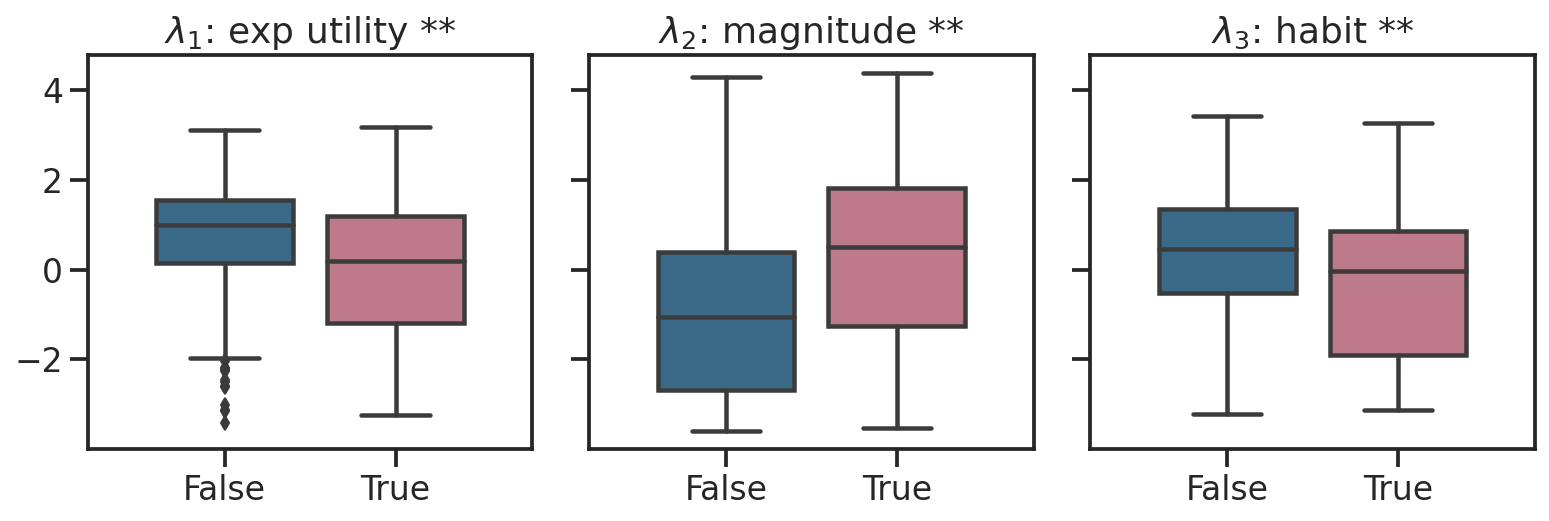

In [3]:
tars =  ['l1', 'l2', 'l3'] 
notes    =  [r'$\lambda_1$: exp utility', r'$\lambda_2$: magnitude', r'$\lambda_3$: habit']
main_effect(data, 
        pred='is_PAT', cond1='is_PAT==0', cond2='is_PAT==1', 
        tar=tars, notes=notes)

l1 t-test: t=-1.8086, p-val:0.0715
l2 t-test: t=0.5020, p-val:0.6160
l3 t-test: t=1.0645, p-val:0.2879


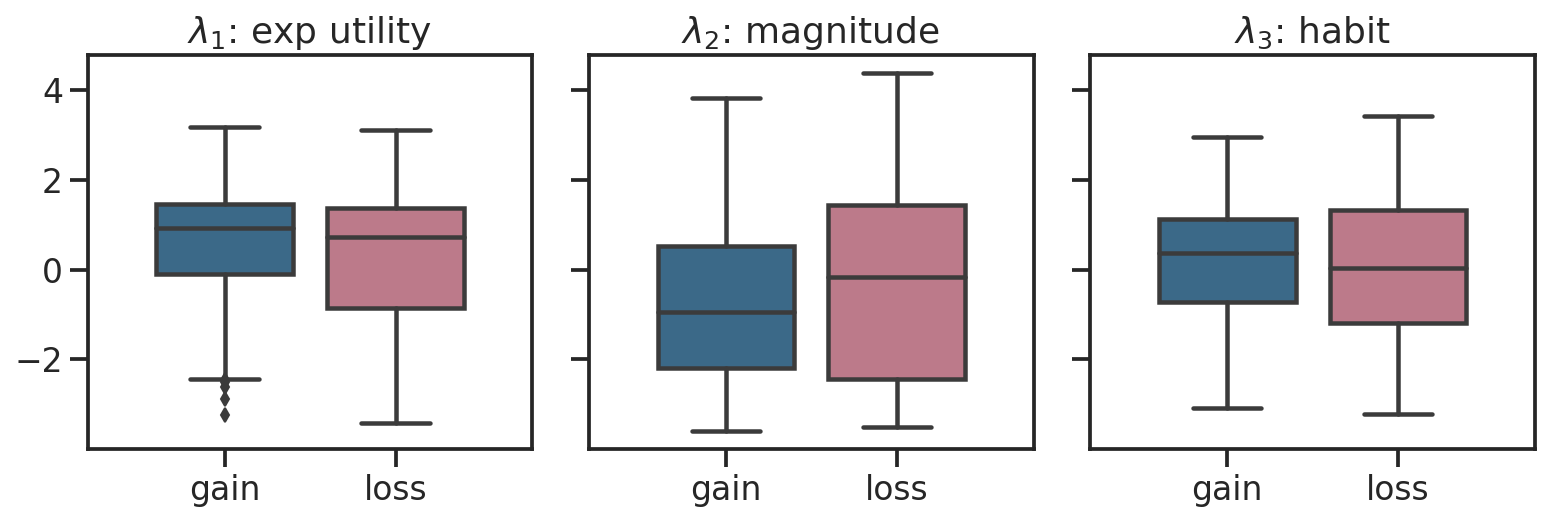

In [6]:
main_effect(data, 
        pred='feedback_type', cond1='b_type=="sta"', cond2='b_type=="vol"', 
        tar=tars, notes=notes)

l1 t-test: t=1.8086, p-val:0.0715
l2 t-test: t=-0.5020, p-val:0.6160
l3 t-test: t=-1.0645, p-val:0.2879


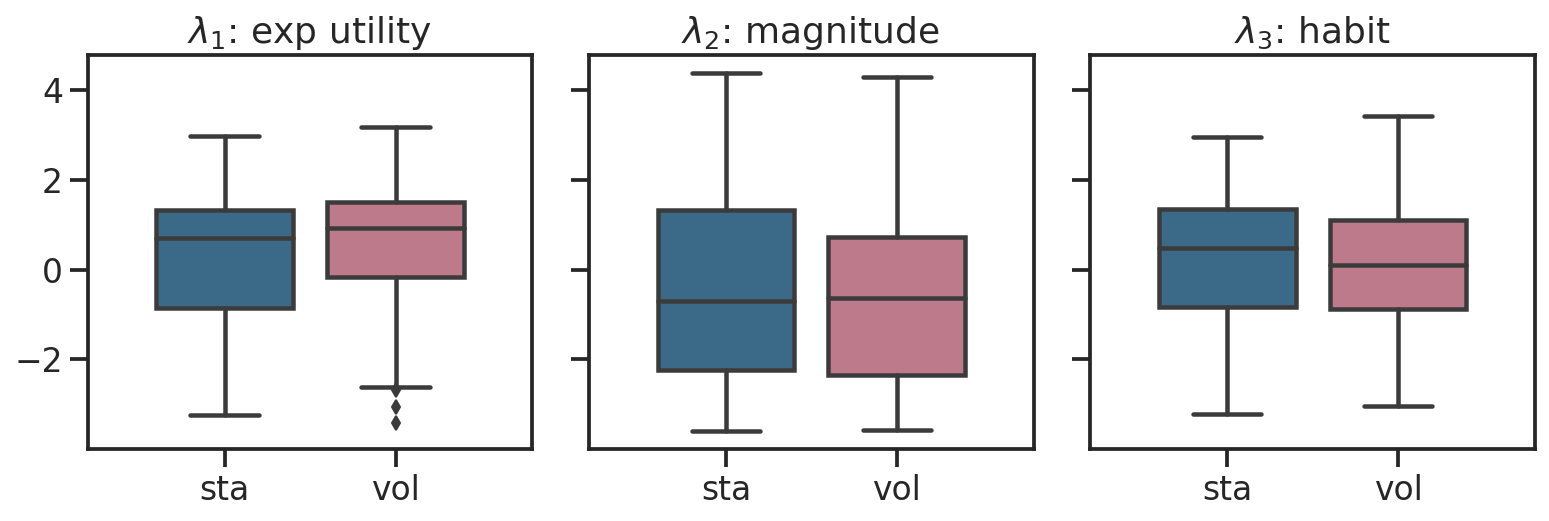

In [5]:
main_effect(data, 
        pred='b_type', cond1='b_type=="vol"', cond2='b_type=="sta"', 
        tar=tars, notes=notes)

l1 f-two way: f=0.6536, p-val:0.4195
l2 f-two way: f=0.2757, p-val:0.5999
l3 f-two way: f=0.0062, p-val:0.9372


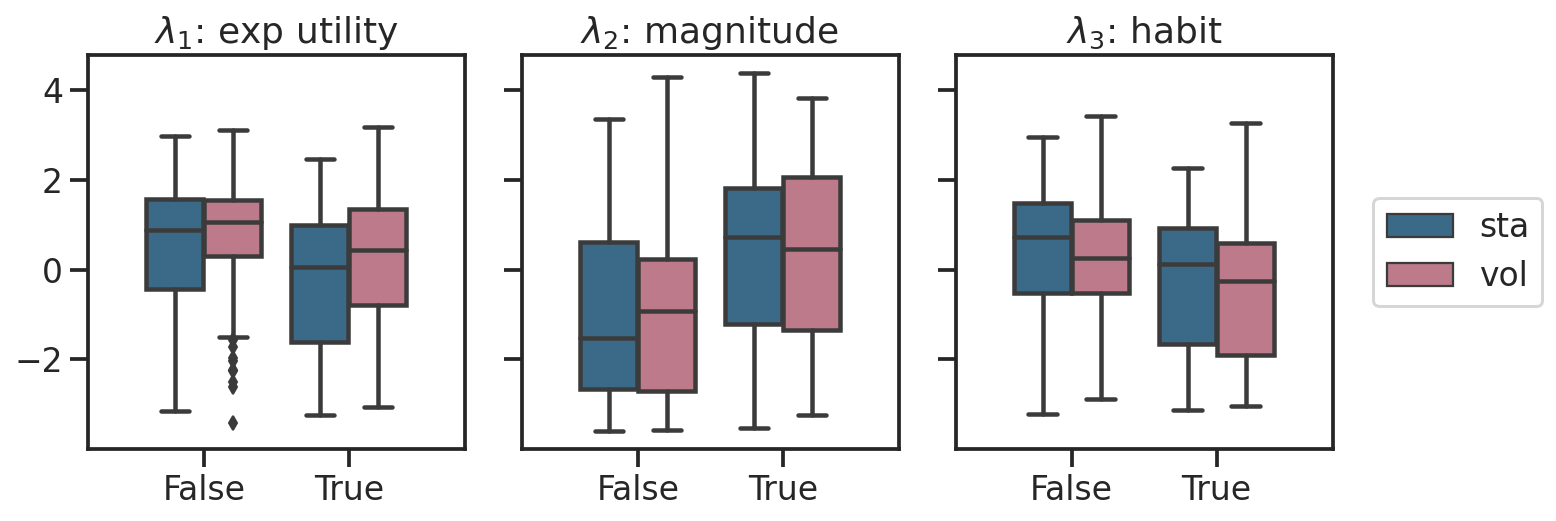

In [7]:
intersect_effect(data, 
        fac1='is_PAT', fac2='b_type',
        tar=tars, notes=notes,)